# Task2 - Prediction using Unsupervised ML
In this section, we'll predict the optimum number of clusters and represent them visually. For this we'll be using K-Mean Clustering.

### Author : Harshit Tiwari
GRIPMAR21

In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kneed import KneeLocator
from sklearn import datasets

In [23]:
# Reading the data
data = pd.read_csv("Iris.csv")
x = data.iloc[:, [1, 2, 3, 4]].values
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Predicting optimum number of clusters

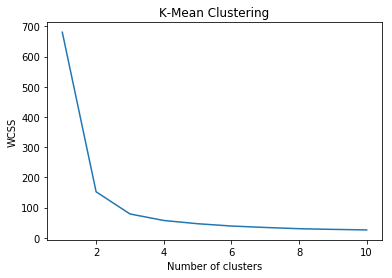

The optimum cluster is 3


In [37]:
from sklearn.cluster import KMeans
# Within cluster sum of squares
wcss = []

for i in range(1, 11):
    k = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    k.fit(x)
    wcss.append(k.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('K-Mean Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#Finding the optimum cluster using Kneed
kneedle = KneeLocator(range(1,11), wcss, S=1.0, curve='convex', direction='decreasing')
elbow = kneedle.elbow
print("The optimum cluster is",elbow)

## Representing the clusters visually

In [33]:
# Applying kmeans to the dataset
k = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_k = k.fit_predict(x)

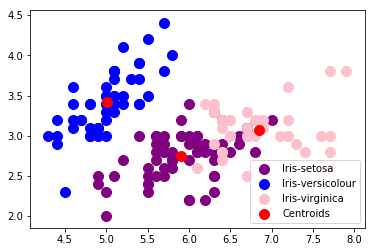

In [36]:
# Visualising the clusters
plt.scatter(x[y_k == 0, 0], x[y_k == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_k == 1, 0], x[y_k == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_k == 2, 0], x[y_k == 2, 1],
            s = 100, c = 'pink', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()